In [1]:
import sys 
from dna import *

In [2]:
#Load source plasmid
nCas9_AID_source = DNA(record="input/addgene_79620.gbk", project="nCas9_AID_source")
pCMV_ABE         = DNA(record="input/addgene_102919.gbk",project="pCMV_ABE")

In [3]:
#Crop each fragmet
frag_a = cropdna(pCMV_ABE,5257,8636)
frag_b = cropdna(nCas9_AID_source,3894,6477)
frag_c = cropdna(nCas9_AID_source,6449,9267)

In [4]:
#Add overlap seqeunces
frag_a  = joindna(DNA("ATCAAGATGCTATAA"),frag_a,DNA("GCACCGAAG")) 
frag_b  = joindna(DNA("GAGAGCCGCCACC"),frag_b)
frag_c  = joindna(frag_c, DNA("TAATGAGTTTAAA"))

In [5]:
#Set end seqeunces at both ends
frag_a = modifyends(frag_a,"*{25}/-{25}","-{25}/*{25}")
frag_b = modifyends(frag_b,"*{25}/-{25}","-{28}/*{28}")
frag_c = modifyends(frag_c,"*{28}/-{28}","-{25}/*{25}")

In [6]:
#Join fragments
product = joindna(frag_a,frag_b,frag_c,topology="circular",project="pCMV-Target-AID")
product.writedna("pCMV-Target-AID.gbk")

In [7]:
import visualize_linear_dna as vl 
import visualize_circular_dna as vc

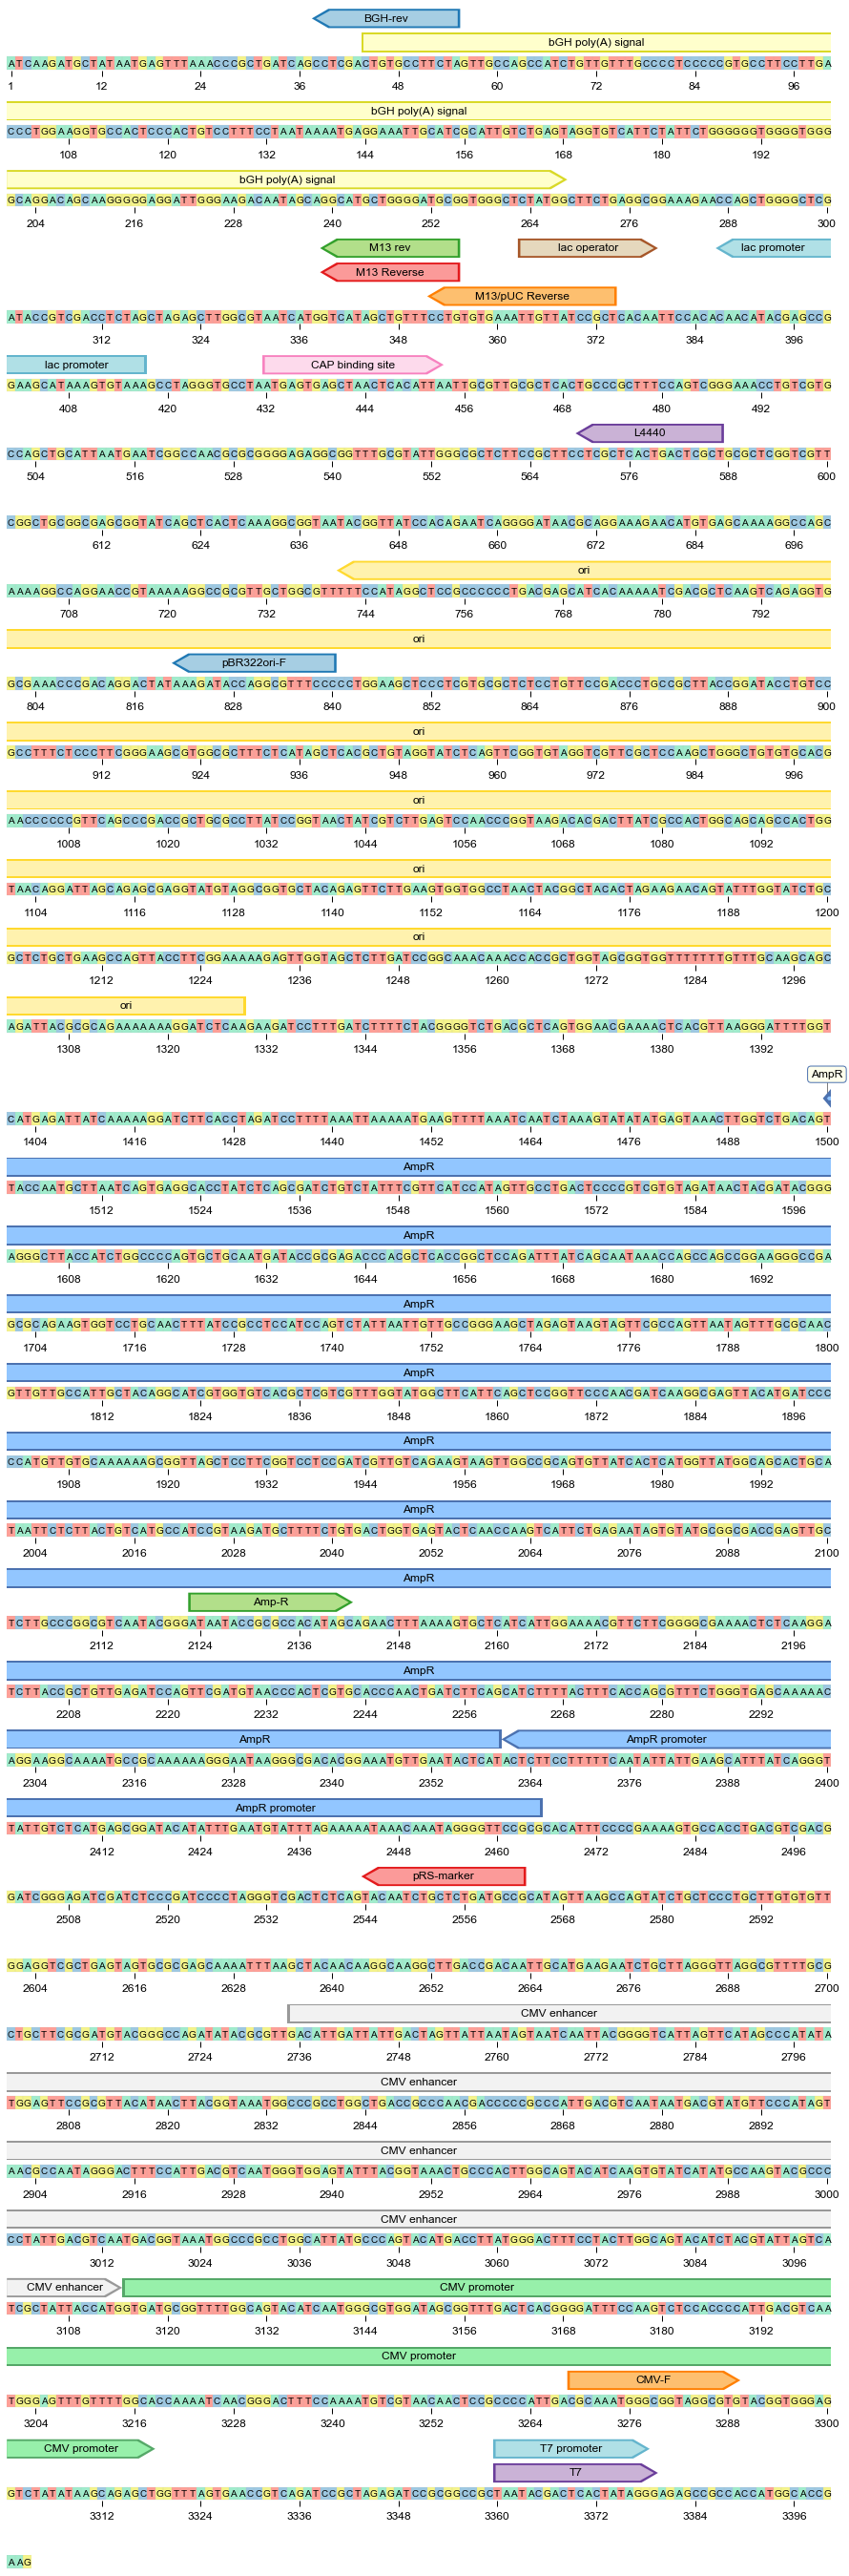

In [8]:
fig, _ = vl.visualize(frag_a, annotation_loc="top", with_seq=True, wrap_width=100)
frag_a.writedna("frag_a.gbk")

feature ID  qualifier:label   feature type  start position  end position  strand  
0           dna               source        0               13            +       
500         dna               source        0               2596          +       
600         dna               source        0               2596          +       
100         N.A.              source        13              2596          +       
200         nCas9_AID_source  source        13              2596          +       
300         SV40 NLS          CDS           19              40            +       
400         Cas9(D10A)        CDS           64              2596          +       



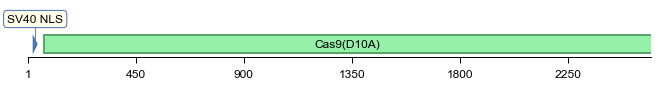

In [9]:
fig, _ = vl.visualize(frag_b)
frag_b.printfeature()

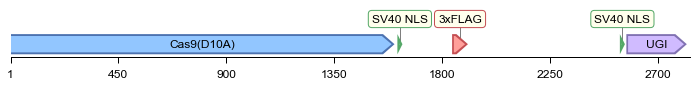

In [10]:
fig, _ = vl.visualize(frag_c)

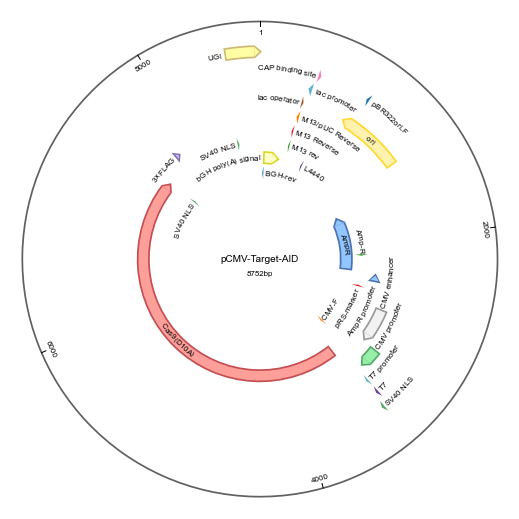

In [11]:
fig, _ = vc.visualize(product)
fig.savefig("Target-AID.pdf",bbox_inches="tight")